In [302]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [303]:
## Load our Dataframes
df_mesure = pd.read_csv('l-mesuretemprivieres-d-r28.csv')  
df_reseau = pd.read_csv('l-reseautemprivieres-d-r28.csv')
df_full = df_mesure.join(df_reseau.set_index('id_sonde'), on='id_sonde')


In [304]:
#Clean our datas
df_full['Teau'] = df_full['Teau'].str.replace(',','.')#Since it's a french DF we replace the , in str to a .
df_full["Teau"] = pd.to_numeric(df_full["Teau"])#That way we can convert it to numeric values

df_full["date_mesure"] = pd.to_datetime(df_full["date_mesure"])#Convert to datetime, it's easier

We have a total of 398786 rows
We have 370803 rows where the temp is inferior to 19° so all good
We have 27983 rows where the temp is superior or egal to 19° so pretty bad
13.251188221420147% of values dangerous to trout
lib_sonde 
Orne T2       5123
Orne T3       4962
Orne T1       4139
Selune T4     3585
Selune T5     3399
Selune T2     2880
Selune T1     1563
Odon T5        589
Odon T4        441
Touques T6     399
Odon T2        343
Ving Bec       237
Monne          163
Touques T4     142
Touques T3      15
Barge            3
dtype: int64
year
2017    6304
2018    5333
2016    4775
2013    4190
2015    4096
2014    3285
dtype: int64


<AxesSubplot:ylabel='Frequency'>

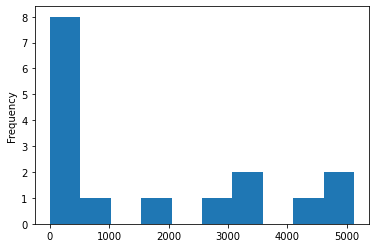

In [325]:
# The lowest temp where trout have trouble is 19° so we search every row where it's the case
# And look if it's in a specific place or a specific year
a = df_full.loc[df_full['Teau'] >= 19]
a['year'] = a['date_mesure'].dt.year

print(f"We have a total of {df_full['Teau'].count()} rows")
print(f"We have {df_full['Teau'].loc[df_full['Teau']< 19].count()} rows where the temp is inferior to 19° so all good")
print(f"We have {df_full['Teau'].loc[df_full['Teau']>= 19].count()} rows where the temp is superior or egal to 19° so pretty bad")
print(f"{370808/27983}% of values dangerous to trout")

print(a.value_counts(["lib_sonde"]))
print(a.value_counts(['year']))
# And we can see that there are places where we have less temp > 19° recorded.
# But by year we seem to have an augmentation per year but isince it's only 5 years nothing significative

a.value_counts(["lib_sonde"]).plot(kind="hist")

lib_sonde
Barge         11.028016
Monne         11.084887
Odon T2       11.705813
Odon T4       11.972710
Odon T5       12.326596
Orne T1       13.126211
Orne T2       13.512869
Orne T3       13.438443
Selune T1     12.593190
Selune T2     12.992335
Selune T4     13.430697
Selune T5     13.422188
Touques T1    11.261529
Touques T3    11.418670
Touques T4    11.702119
Touques T6    12.301855
Ving Bec      11.272774
Name: Teau, dtype: float64
lib_sonde
Barge         14.334306
Monne         15.040328
Odon T2       15.472961
Odon T4       15.962775
Odon T5       16.415134
Orne T1       18.780170
Orne T2       19.447032
Orne T3       19.324786
Selune T1     17.042278
Selune T2     17.681540
Selune T4     18.436422
Selune T5     18.391596
Touques T1    14.282347
Touques T3    14.555219
Touques T4    15.306332
Touques T6    15.965354
Ving Bec      14.716911
Name: Teau, dtype: float64


<AxesSubplot:xlabel='lib_sonde'>

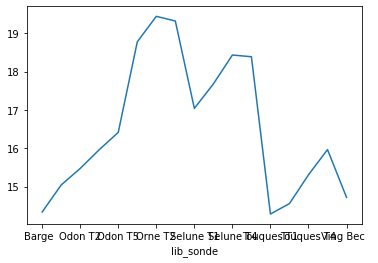

In [315]:
# Mean temperature per zone and especially in summer
w = df_full.groupby(["lib_sonde"])
print(w.Teau.mean())

v = df_full
v['month'] = v['date_mesure'].dt.month
v = v.loc[(v['month'] > 5) &  (v['month'] < 10)]
v = v.groupby(["lib_sonde"])
print(v.Teau.mean())
# We can see that the focusing in summer is realling important
# And we can see that there are some area that are hotter than other
v.Teau.mean().plot()


<AxesSubplot:xlabel='year'>

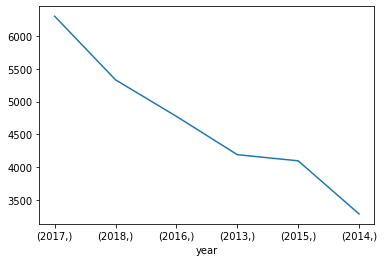

In [324]:
a.value_counts(['year']).plot()

<AxesSubplot:ylabel='Frequency'>

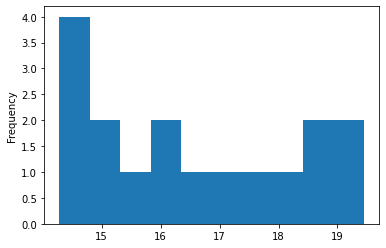

In [316]:
v.Teau.mean().plot(kind="hist")
# The frequency of 19 is pretty high

In [317]:
# Essayez de faire une carte en utilisant les coord en fonction des temps moyennes

In [ ]:
''' WORKING BUT NOT READABLE
p = df_full.groupby(df_full.date_mesure.dt.to_period("M"))
labels = list(p.groups)
means = p['Teau'].mean().tolist()
means = [round(num, 1) for num in means]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means, width, label='Men')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()
'''